In [15]:
import numpy as np
import pandas as pd
from skimage import io
from sklearn import metrics, preprocessing
from matplotlib import pyplot as pl
import additional_stuff

In [16]:
# Implement the euclidean_distance function here:
def euclidean_distance(u, w):
    return np.sqrt(np.sum(np.power(u - w, 2)))

# Check if it is working! Here are two vectors:
v1 = np.array([1.1, 2.5, 4.4, 0.1, 2.3, 3.4])
v2 = np.array([2.0, 2.2, 1.0, 1.0, 2.5, 3.4])

# Call the euclidean_distance function below to compute the distance between them:
dist = euclidean_distance(v1, v2)

print('Distance between v1 and v2: ', dist)  # (For these vectors, it should be something like 3.6482...)


Distance between v1 and v2:  3.6482872693909405


In [17]:
# The Euclidean distance function can be used for k-Means clustering:
def k_means(X, k=3, n_iterations=10):
    # X is a N-by-M numpy array of N data points, each with M dimensions/features
    # k is the number of clusters to compute (3 is the default value)
    # n_iterations is the maximum number of iterations we want (100 is the default value)

    # First, we need to initialise the clusters.
    # To simplify, we will use the MacQueen method, selecting 'k' random points of 'X' as initial centroids:
    centroids = additional_stuff.mac_queen_initialisation(X, k)

    # Keep a history of the centroids' movements:
    centroids_history = np.zeros((n_iterations+1, k, X.shape[1]))
    centroids_history[0, :, :] = centroids

    # This will store the cluster membership of each data point in 'X':
    membership = np.zeros((X.shape[0]))

    # The k_means algorithm is iterative. Start a loop here for 'n_iterations':
    for ii in range(n_iterations):

        # In each loop, for each data point:
        for index in range(X.shape[0]):

            # Compute the Euclidean distance between the data point and each centroid:
            distance = [euclidean_distance(X[index], cc) for cc in centroids]

            # Then, assign each data point to the cluster with the nearest centroid:
            membership[index] = np.argmin(distance)

        # Now, recompute the centroids of each cluster, computing the mean of the cluster data points:
        for cc in range(k):
            centroids[cc] = np.mean(X[membership == cc], axis=0)

        centroids_history[ii+1, :, :] = centroids

    # Finally, return the clustering result:
    return membership, centroids, centroids_history


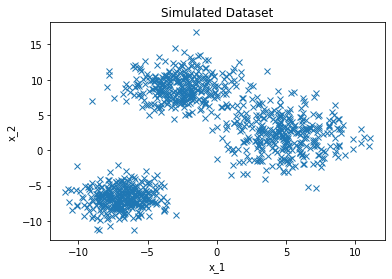

<Figure size 432x288 with 0 Axes>

In [18]:
# Now, to test it, we shall use a simulated dataset:
X, _ = additional_stuff.simulated_dataset()

# We can use matplotlib to visualise the simulated data points:
pl.plot(X[:, 0], X[:, 1], 'x')
pl.title('Simulated Dataset')
pl.xlabel('x_1')
pl.ylabel('x_2')
pl.show()
pl.cla()
pl.clf()

# Now, we can apply our implementation of 'k-means' to this dataset:
membership, centroids, centroids_history = k_means(X, k=3)


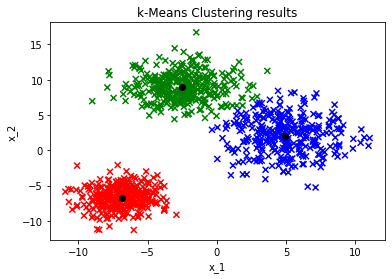

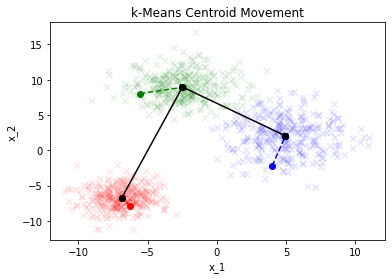

In [19]:
# Using matplotlib, we can plot the result:
# First, plot the data points:
colors = ['red', 'green', 'blue']
pl.scatter(X[:, 0], X[:, 1], marker='x', color=[colors[int(_y)] for _y in membership])

# Then, plot the final cluster centroids:
pl.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='black')
pl.title('k-Means Clustering results')
pl.xlabel('x_1')
pl.ylabel('x_2')
pl.show()

# We can also see the movement of each centroid during the iterations:
# Plot the data points again (use alpha to make them transparent):
pl.scatter(X[:, 0], X[:, 1], marker='x', alpha=0.1, color=[colors [int(_y)] for _y in membership])

# And plot each centroid's movement:
pl.plot(centroids_history[:, 0, 0], centroids_history[:, 0, 1], '--', marker='o', color='red')
pl.plot(centroids_history[:, 1, 0], centroids_history[:, 1, 1], '--', marker='o', color='green')
pl.plot(centroids_history[:, 2, 0], centroids_history[:, 2, 1], '--', marker='o', color='blue')

# Then, plot the final cluster centroids:
pl.plot(centroids[:, 0], centroids[:, 1], marker='o' , color='black')
pl.title('k-Means Centroid Movement')
pl.xlabel('x_1')
pl.ylabel('x_2')
pl.show()

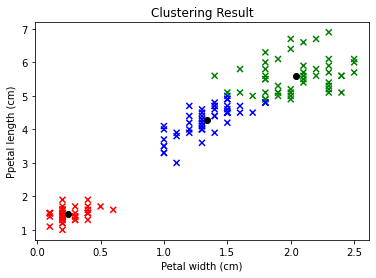

In [23]:
# We can also apply our k-means algorithm to a real dataset.
# To do that, we can use pandas to import the dataset:
data = pd.read_csv('iris.txt')

# Pandas allows us to import datasets with headers, data point names, labels, numerical and text features.
# Using Spyder, you can analyse the dataset using the Variable Explorer.
# To use k-means, let's select just two columns of the dataset:
X = np.array(data[['petal width', 'petal length']])

# And perform k-Means clustering with k = 3 (no. of classes)
membership, centroids, _ = k_means(X, k=3)

# And plot the results:
pl.scatter(X[:, 0], X[:, 1], marker='x', color=[colors[int(_y)] for _y in membership])
pl.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='black')
pl.title('Clustering Result')
pl.xlabel('Petal width (cm)')
pl.ylabel('Ppetal length (cm)')
pl.show()

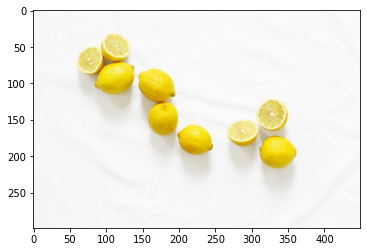

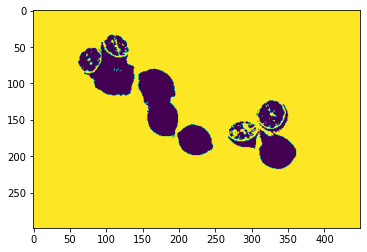

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [21]:
# Furthermore, k-means is also used in Image Analysis, for segmentation of images.
# Let's try to apply the same algorithm to an image.

# First, we use scikit-image to import the image:
image = io.imread('lemons.jpg')

# Visualise the image using matplotlib:
pl.imshow(image)
pl.show()

# Each pixel should be considered a single sample (in this case, with three
# features - RGB). We need to restructure the image accordingly:
iamge_reshaped = image.reshape((image.shape[0]*image.shape[1], 3))

# Now, we finally apply k-means to it:
membership, _, _ = k_means(iamge_reshaped, k=2)

# Reshaping and visualising the result:
result = membership.reshape((image.shape[0], image.shape[1]))
pl.imshow(result)
pl.show()

# Save the result as an image:
io.imsave('result.jpg', result)


In [22]:
#Logistic Regression


#Encode labels to use in classifier (logistic regression or others)
#le = preprocessing.LabelEncoder()
#y = le.fit_transform(data[['class']])